In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
data=pd.read_csv('restaurant-revenue-prediction/train.csv.zip')
data

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [2]:
data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

/var/folders/3s/typ7cmgs2gz1qrxghyfqx8j80000gn/T/ipykernel_50706/1836219347.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.revenue)


<AxesSubplot: xlabel='revenue', ylabel='Density'>

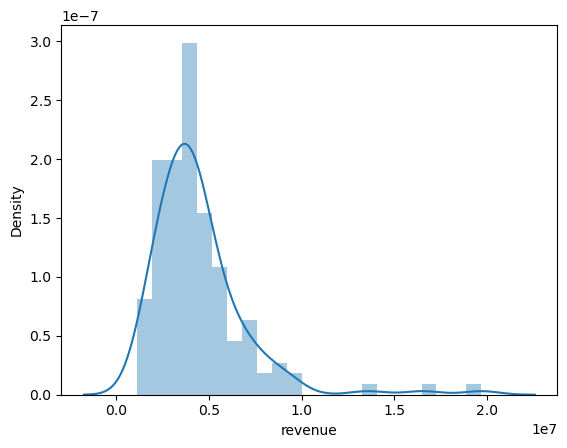

In [3]:
import seaborn as sns
sns.distplot(data.revenue)

/var/folders/3s/typ7cmgs2gz1qrxghyfqx8j80000gn/T/ipykernel_50706/598453383.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.revenue)


<AxesSubplot: xlabel='revenue', ylabel='Density'>

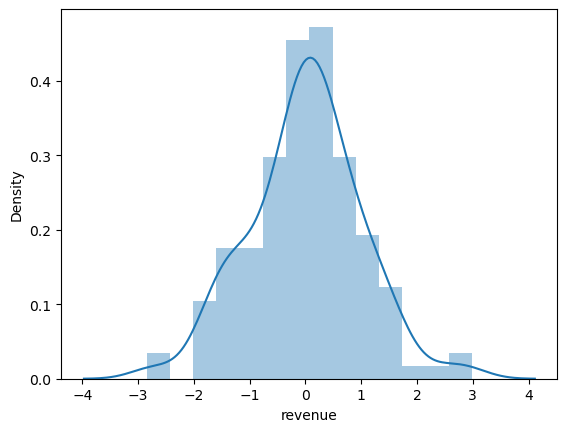

In [4]:
from sklearn.preprocessing import PowerTransformer
p=PowerTransformer(method='box-cox')
data['revenue']=p.fit_transform(data[['revenue']])
import seaborn as sns
sns.distplot(data.revenue)

In [6]:
data['Open_date']=data['Open Date']
data

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Open_date
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,0.776212,07/17/1999
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,1.168781,02/14/2008
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,-1.407363,03/09/2013
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,-0.800613,02/02/2012
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,0.231176,05/09/2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,0,0,0,0,0,0,0,0,0.822272,06/25/2008
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,0,0,0,0,0,0,0,0,1.709230,10/12/2006
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,0,0,-0.913678,07/08/2006
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,0,0,0,0,0,0,0,0,1.247812,10/29/2010


In [7]:
data.Open_date=pd.to_datetime(data.Open_date,dayfirst=False)
data[['year']]=pd.DataFrame(data.Open_date.dt.year)
data[['day']]=pd.DataFrame(data.Open_date.dt.day)
data[['month']]=pd.DataFrame(data.Open_date.dt.month)

In [8]:
data.drop(columns=['Id','Open_date','Open_date','Open Date','City','Type'],inplace=True)

In [9]:
x=data.drop(columns=['revenue'])
y=data.revenue

In [10]:
x

,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P31,P32,P33,P34,P35,P36,P37,year,day,month
0,Big Cities,4,5.0,4.0,4.0,2,2,5,4,5,...,3,4,5,5,4,3,4,1999,17,7
1,Big Cities,4,5.0,4.0,4.0,1,2,5,5,5,...,0,0,0,0,0,0,0,2008,14,2
2,Other,2,4.0,2.0,5.0,2,3,5,5,5,...,0,0,0,0,0,0,0,2013,9,3
3,Other,6,4.5,6.0,6.0,4,4,10,8,10,...,12,10,6,18,12,12,6,2012,2,2
4,Other,3,4.0,3.0,4.0,2,2,5,5,5,...,1,3,2,3,4,3,3,2009,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Other,2,3.0,3.0,5.0,4,2,4,4,4,...,0,0,0,0,0,0,0,2008,25,6
133,Big Cities,4,5.0,4.0,4.0,2,3,5,4,4,...,0,0,0,0,0,0,0,2006,12,10
134,Other,3,4.0,4.0,4.0,2,3,5,5,5,...,0,0,0,0,0,0,0,2006,8,7
135,Big Cities,4,5.0,4.0,5.0,2,2,5,5,5,...,0,0,0,0,0,0,0,2010,29,10


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline 
from sklearn import set_config
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,PowerTransformer,StandardScaler
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
nom_cols=[0]
null_cols=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40]
num_cols=[]
trans=make_column_transformer((OneHotEncoder(sparse=False),nom_cols),(StandardScaler(),num_cols),
                              (PowerTransformer(),null_cols),remainder='passthrough')
set_config(display='diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 [0]),
                                ('standardscaler', StandardScaler(), []),
                                ('powertransformer', PowerTransformer(),
                                 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                  15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
                                  26, 27, 28, 29, 30, ...])])

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
pipe=make_pipeline(trans,lr)

In [13]:
pipe.fit(x_train,y_train)

/Users/kinhanglo/Desktop/machine-learning/Machine-Learning-environment/env/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [0]),
                                                 ('standardscaler',
                                                  StandardScaler(), []),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...])])),
                ('linearregression', LinearRegression())])

In [14]:
pred=pipe.predict(x_test)
pred

array([-1.6999798 , -0.14108298,  0.89927609, -0.60862159,  0.33242264,
        0.52270369, -0.47054224,  1.26947284,  0.3179867 , -0.32547294,
       -0.66627808,  0.63897825, -0.17791796, -0.33261199,  0.87943606,
        0.71464198, -0.07820724, -0.32857317,  1.01712498, -0.59356858,
        0.4843823 ,  0.15309977,  0.64131371, -0.74302559, -0.20915852,
        1.23568384,  0.71944124, -0.14473691,  0.87461372, -0.00337575,
       -0.4630089 ,  0.30166905,  0.25656959,  0.48204981,  0.30347277])

In [15]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,y_test)

1.008547041800646

In [19]:
pred.to_csv('test.csv', columns=['Id', 'Prediction'], index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'